In [1]:
#Here I import the relevant function libraries
#This can be done in many ways
#To import an entire library (e.g. scipy) so that functions accessed by typing "lib_name.func_name"
%matplotlib inline
import matplotlib

#To import a subsection of a library
import scipy.optimize

#To import the whole library under a different name, so you can type "diff_name.func_name"
import numpy as np
import matplotlib.pyplot as plt

#To import just a particular function
from time import time
from math import sin
#This may be confusing but I'm grabbing a function usually denoted with "time.time"

In [2]:
#First of all we need to read the example data file into a list
#I will create an empty list and append the data as I read the file
#Note appending is a VERY inefficient opperation, however for less than a ~million repeats it's fine

#Make an empty list:
datalist = []

#Open the file. Here the 'r' means 'read'
f = open('ex_data.dat','r')

#Now read all the lines of the file into a list called lines
#For very large files this isn't always a good plan as you may not want to store the whole file in the memory, such files should be read line by line
lines = f.readlines()

#Now loop over ever line and record the value as a floating point number in datalist
#Notice that python's loop functionality is very flexible
for line in lines:
    datalist.append(float(line))

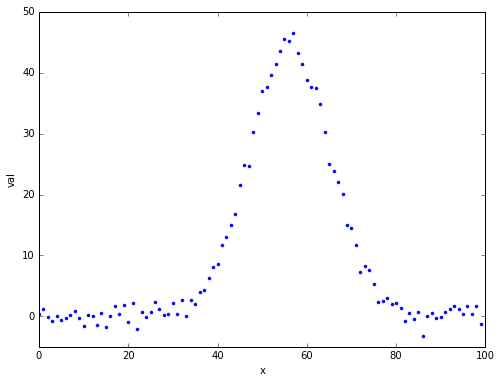

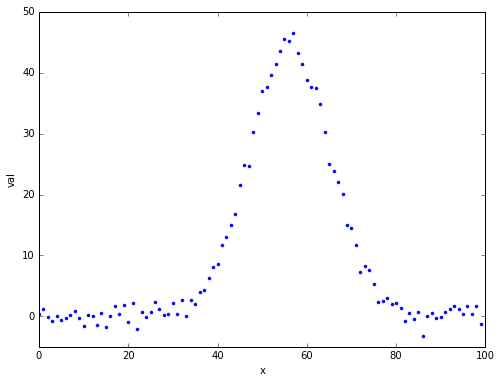

In [3]:
#Now we want to we want to create a plot
#Create a figure called 'fig' and a set of axes called 'ax'
fig,ax = plt.subplots(figsize=(8,6))

#Create a dummy list of numbers to plot along the x-axis
#We will create a numpy array using the 'numpy.arange()' function
#The syntax for this is (start_value,non_inclusive_end_value,step_size)
#Here I also use the 'len()' function which returns the length of a list/array
x_vals = np.arange(0,len(datalist),1)

#Now plot the data on the axes
#Here I choose to plot the data as blue dots
ax.plot(x_vals,datalist,'b.')

#Set the limits, and label the axes
ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

#Force the plot to be displayed
plt.show()

#Save the plot
fig.savefig('ex_fig.jpg',dpi=300)

In [4]:
#Now make a function of a gaussian distribution
def gaussian(x,mean,sigma,A):
    
    #Set the normalisation
    norm = A/(sigma*np.sqrt(2.*np.pi))
    
    return norm*np.exp( -((x-mean)**2.) / (2.*sigma**2.) )

In [5]:
#First we will fit this the bad, slow way

#Start with an impossibly large value of least_sq
least_sq = 1000000000.

#Loop over each parameter and over each value of x and calculate where least_sq is minimised
#Make some value approximate guesses of where the min/max values of the parameters are
for mean in np.arange(50.,60.,1.):
    for sigma in np.arange(5.,15.,1.):
        for A in np.arange(500.,1500.,10.):
            least_sq_temp = 0.
            for i in range(0,len(x_vals),1):
                #Add the current deviations to the temp value of least_sq
                least_sq_temp += (datalist[i] - gaussian(x_vals[i],mean,sigma,A))**2.
            
            #If least_sq_temp is a better fit than your current stored value then update the fit
            if least_sq_temp < least_sq:
                least_sq = least_sq_temp
                A_fit = A
                mean_fit = mean
                sigma_fit = sigma

print 'A = ',A_fit
print 'Mean = ',mean_fit
print 'Sigma = ',sigma_fit

A =  1010.0
Mean =  56.0
Sigma =  9.0
A =  1010.0
Mean =  56.0
Sigma =  9.0


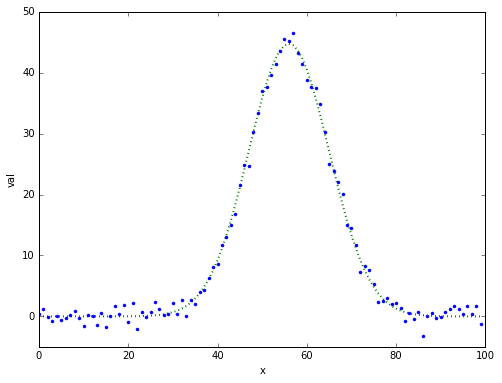

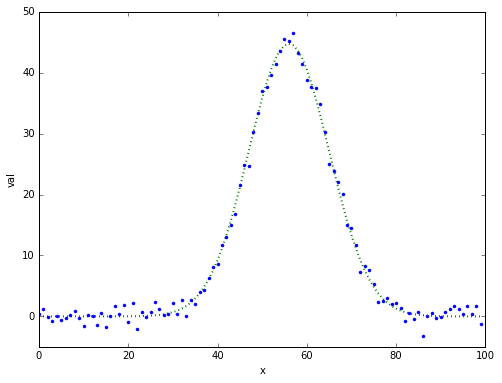

In [6]:
#Reproduce the plot, but with the fit
fig,ax = plt.subplots(figsize=(8,6))

x_vals = np.arange(0,len(datalist),1)

#Here I select the plot the fit as a green, dotted, 2pt line
ax.plot(x_vals,gaussian(x_vals,mean_fit,sigma_fit,A_fit),lw=2,ls='dotted',color='green')
ax.plot(x_vals,datalist,'b.')

ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

plt.show()

#Save the plot
fig.savefig('ex_fit1_fig.jpg',dpi=300)

In [7]:
#Now do the fit the smart way, by using a built in curve fitting function
#The function returns the fit parameters and the covariances
#The syntax is (function_to_fit, x_values, data_values, p0 = list_of_initial_guesses)
fit,cov = scipy.optimize.curve_fit(gaussian, x_vals, datalist, p0 = [55.,10.,800.])

print 'Mean = ',fit[0]
print 'Sigma = ',fit[1]
print 'A = ',fit[2]

Mean =  56.0803931592
Sigma =  8.9931758567
A =  1008.72516827
Mean =  56.0803931592
Sigma =  8.9931758567
A =  1008.72516827


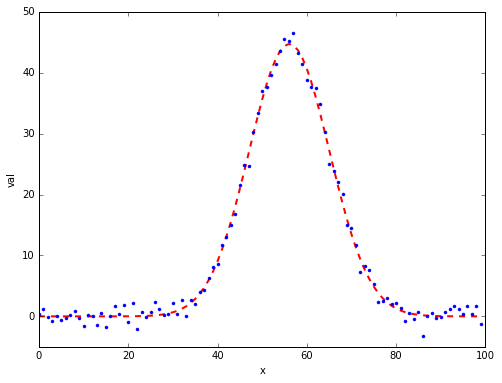

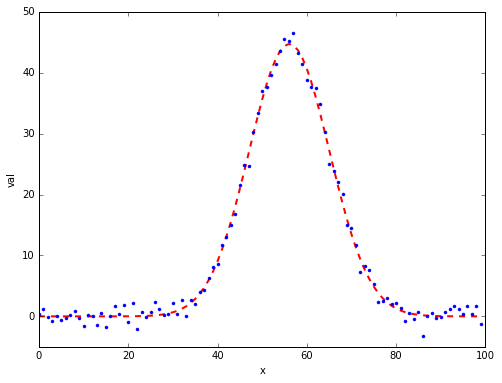

In [8]:
#Reproduce the plot, but with the new fit
fig,ax = plt.subplots(figsize=(8,6))

x_vals = np.arange(0,len(datalist),1)

ax.plot(x_vals,gaussian(x_vals,fit[0],fit[1],fit[2]),lw=2,ls='dashed',color='red')
ax.plot(x_vals,datalist,'b.')

ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

plt.show()

#Save the plot
fig.savefig('ex_fit2_fig.jpg',dpi=300)

In [9]:
#This is the end of the example, but below are some useful things to note

In [10]:
#Array Arithmetic

#When dealing with large lists (the norm in astronomy) array arithmetic is nearly always namy times faster
#You should write as much of your code using numpy arrays as you possibly can
#The only real drawback of arrays is that you cannot append values to them, they have fixed length

#Here I will take the sine of a million element array using a loop and using array arithmetic 
#Look at the difference in duration

#Generate an array of 10 million numbers between 0 and pi
val_arr = np.random.uniform(0.,np.pi,1E6)


#Recast these arrays as lists
val_list = list(val_arr)

start_time = time()
#Note I've used the shorthand version of range here (the default start is 0 and default step is 1)
for i in range(1000000):
    #This will overwrite the current value with it's sine
    val_list[i] = sin(val_list[i])
print "Loop time: ",(time()-start_time),"sec"

start_time = time()
val_arr = np.sin(val_arr)
print "Array arithmetic time: ",(time()-start_time),"sec"

Loop time:  0.311264038086 sec
Array arithmetic time:  0.0395338535309 sec
Loop time:  0.311264038086 sec
Array arithmetic time:  0.0395338535309 sec


In [11]:
#Integer Arithmetic

#If you're not used to coding, I've got some bad news for you, computer are pretty dumb
#Python will identify what a number you give is by how you write it
#If the number doesn't have a decimal point it will assume it's an integer

print 3/2

print 3./2.

1
1.5


In [12]:
#Pass by Reference vs Pass by Value

#In most cases python defaults to passing by reference
#This means that when you say 'a = b' you are essentially telling the computer that they are the same thing
#Whatever you do to b is also done to a

a = [1,2,3,4,5]
b = a

print a,b

#Delete the value 3 from the list a
a.remove(3)

print a,b

[1, 2, 3, 4, 5] [1, 2, 3, 4, 5]
[1, 2, 4, 5] [1, 2, 4, 5]


In [13]:
#To overcome this you have to trick the computer into duplicating the list

a = [1,2,3,4,5]
#This will copy the array from 'start_point:end_point', the default is the start/end of the list
b = a[:]

a.remove(3)

print a,b

[1, 2, 4, 5] [1, 2, 3, 4, 5]
[1, 2, 4, 5] [1, 2, 3, 4, 5]


In [14]:
#There some other tricks you can play with this

a = [1,2,3,4,5]

#To return the list in reverse
#This is saying go through the whole list, but stepping one place backwards each time
print a[::-1]

#To return every other value
print a[::2]

[5, 4, 3, 2, 1]
[1, 3, 5]
[5, 4, 3, 2, 1]
[1, 3, 5]


In [15]:
#Another python is to use sets
#If you want to remove duplicates from a list you don't have to do a complicated algorithm

a = [1,1,2,3,3,3,3,4,5,5,5]

#To remove duplicates you can define the list as a set
#Sets are mathematical objects that cannot have duplicates
#Then you can redefine as a list
#Doing this all at once

print list(set(a))

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
